In [19]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline

#time
import datetime as datetime

#Prophet
from fbprophet import Prophet


from sklearn import metrics

In [20]:
start = datetime.datetime(2017,1,1)
df_2379 = pdr.DataReader('2379.TW', 'yahoo', start=start)
df_2379.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,102.5,101.5,102.0,102.0,291000.0,91.827194
2017-01-04,102.5,100.0,102.5,100.5,1193000.0,90.476784
2017-01-05,102.5,100.0,101.0,101.5,2110000.0,91.377052
2017-01-06,102.0,100.5,101.5,101.0,1151000.0,90.926926
2017-01-09,101.5,100.5,101.0,101.0,927000.0,90.926926


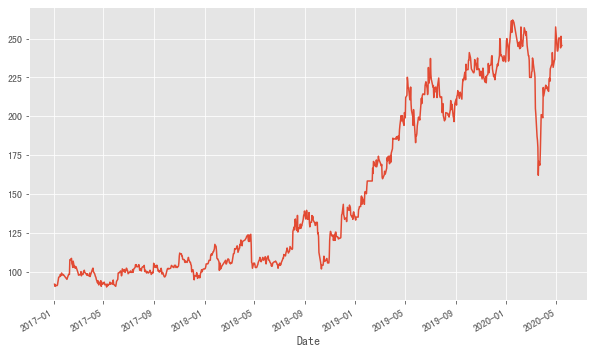

In [21]:
plt.style.use('ggplot')
df_2379['Adj Close'].plot(figsize=(10, 6));

In [22]:
new_df_2379 = pd.DataFrame(df_2379['Adj Close']).reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
new_df_2379.head()

,ds,y
0,2017-01-03,91.827194
1,2017-01-04,90.476784
2,2017-01-05,91.377052
3,2017-01-06,90.926926
4,2017-01-09,90.926926


In [27]:
new_df_2379['y'] = np.log(new_df_2379['y'])
# 定義模型
model = Prophet()

# 訓練模型
model.fit(new_df_2379)

# 建構預測集
future = model.make_future_dataframe(periods=60) #forecasting for 1 month from now.

# 進行預測
forecast = model.predict(future)

forecast.head()


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-03,1.500372,1.496566,1.517624,1.500372,1.500372,0.005879,0.005879,0.005879,-0.000497,-0.000497,-0.000497,0.006377,0.006377,0.006377,0.0,0.0,0.0,1.506251
1,2017-01-04,1.501138,1.495762,1.518364,1.501138,1.501138,0.006059,0.006059,0.006059,-0.000559,-0.000559,-0.000559,0.006618,0.006618,0.006618,0.0,0.0,0.0,1.507197
2,2017-01-05,1.501904,1.497496,1.520040,1.501904,1.501904,0.006409,0.006409,0.006409,-0.000502,-0.000502,-0.000502,0.006911,0.006911,0.006911,0.0,0.0,0.0,1.508313
3,2017-01-06,1.502670,1.498889,1.520290,1.502670,1.502670,0.006682,0.006682,0.006682,-0.000566,-0.000566,-0.000566,0.007248,0.007248,0.007248,0.0,0.0,0.0,1.509352
4,2017-01-09,1.504968,1.500860,1.522796,1.504968,1.504968,0.007324,0.007324,0.007324,-0.001088,-0.001088,-0.001088,0.008412,0.008412,0.008412,0.0,0.0,0.0,1.512292


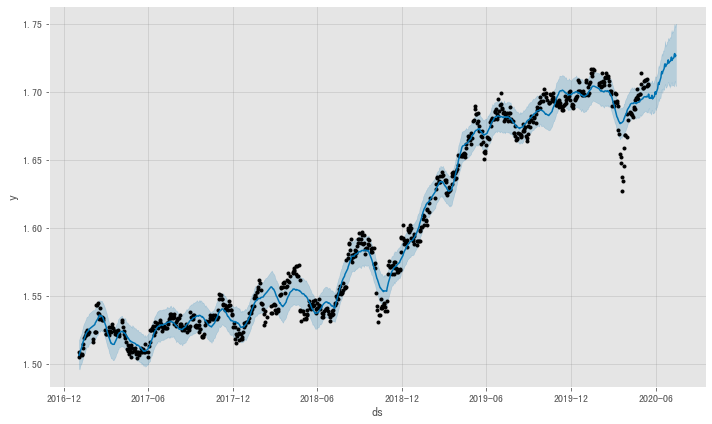

In [28]:
figure=model.plot(forecast)

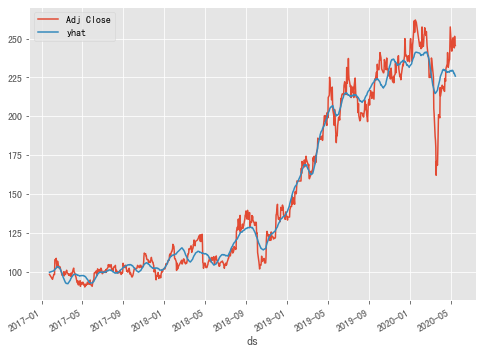

In [25]:
df_2379_close = pd.DataFrame(df_2379['Adj Close'])
two_years = forecast.set_index('ds').join(df_2379_close)
two_years = two_years[['Adj Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)
two_years[['Adj Close', 'yhat']].plot(figsize=(8, 6));

In [12]:
two_years_AE = (two_years.yhat - two_years['Adj Close'])
two_years_AE.describe()

count    800.000000
mean       0.000551
std        0.966532
min       -3.606790
25%       -0.581010
50%        0.022522
75%        0.574982
max        5.388007
dtype: float64

In [13]:
print ("MSE:",metrics.mean_squared_error(two_years.yhat, two_years['Adj Close']))


MSE: 0.9330166075101128


In [14]:
print ("MAE:",metrics.mean_absolute_error(two_years.yhat, two_years['Adj Close']))


MAE: 0.7214626287626302


Text(0.5, 0, 'Date')

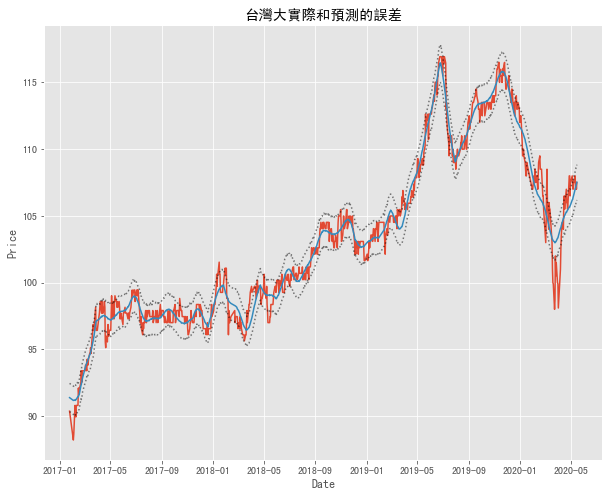

In [17]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(two_years['Adj Close'])
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('瑞昱實際和預測的誤差')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [18]:
import matplotlib
matplotlib.matplotlib_fname()

'/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'